In [1]:
import os
import sys
import matplotlib.pylab as plt
import numpy as np
import statistics as stat
%matplotlib notebook

#sys.path

In [2]:
from ztf_hdf5 import Read_LightCurve

In [3]:
class_ = Read_LightCurve(file_name='Meta_fit.hdf5', inputDir='/Users/manon/dataLC')
meta = class_.get_table(path='meta')
meta

z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,n_phase_neg,n_phase_pos,n_phase_min,n_phase_max,n_r_band,n_g_band,n_i_band,sel,z_fit,z_err,t0_fit,t0_err,x0_fit,x0_err,x1_fit,x1_err,c_fit,c_err,chisq,ndof,z_t0_cov,z_x0_cov,z_x1_cov,z_c_cov,x0_t0_cov,x0_x1_cov,x0_c_cov,t0_x1_cov,t0_c_cov,x1_c_cov,fitstatus
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str7,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8
0.08932922710458362,58200.96684085227,0.0005189890523031339,0.001636025684963726,-0.009621064087089284,0.002687398567590333,170.597521744629,38.91462702855977,0.018441120147018823,224,SN_4169,0,93,0,61,68,24,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata
0.061976154625606086,58338.36056473855,0.0008950279049716499,-1.2330761391961371,0.0029212409652947142,0.040771020495913524,232.4728687213442,25.259783152058645,0.0416964405538632,225,SN_4170,10,17,2,7,11,9,7,1,0.061876163176428446,0.0001154844493067679,58338.39990934609,0.11166849100482068,0.0009178406590004032,1.674401111007405e-05,-1.4797479681862062,0.17935712335195808,-0.011326558763450505,0.01496016005691672,32.06230806298497,36,1.2499401281279638e-09,-4.951030334403533e-13,-2.865039440942829e-09,-5.028000394651174e-10,-6.265186650619156e-08,-1.6705872936440325e-06,-2.123918040023018e-07,0.006669634408383506,1.467256857433494e-05,0.0010681337053148063,fitok
0.09312585114400057,58319.791653985965,0.0005306102953940758,2.1112296138815716,-0.03834907761274353,0.058574627538231575,254.17633469449294,19.357015333655376,0.05322091230112512,226,SN_4171,9,25,3,16,19,9,6,1,0.093225849850612,0.00015998405701470042,58319.470771311964,0.16653336529634544,0.0005381515938094562,1.493417256720319e-05,1.6682424392137136,0.2289044881105926,-0.042201263656535905,0.02048226199380142,72.6636889453547,52,1.0275356513853842e-09,-8.385030464710808e-14,1.1775536608471842e-09,-5.7408321726526334e-11,-2.064332925822222e-08,-2.2679634515758988e-06,-2.2547297237440662e-07,0.008822809823289927,-0.0003250244355952036,0.0010945173640749164,fitok
0.08770781296680773,58502.439441156406,0.0006809648041430265,-0.3799933816194843,-0.08580322398323993,0.08579771796144472,119.53740497812893,-13.542957707796157,0.08783875207654564,228,SN_4172,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata
0.08602027928304734,58452.46919021532,0.0009446950517002247,1.4564424095909885,-0.14905526578316125,0.04764526739488718,286.9634303868508,51.11695629567124,0.05650096019263499,230,SN_4173,1,3,1,0,2,2,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata
0.09228156925336276,58257.83865191448,0.000857062544930689,0.9172503136901872,-0.168004714178543,0.09974653391596815,220.25041857044565,-26.943190822149724,0.08997006889986936,231,SN_4174,2,10,2,7,7,5,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata
0.06186741808650339,58408.57364259143,0.0011689767170884834,0.43889494590147643,-0.03482647805716986,0.19446033976299848,299.94335190019706,7.184025625335687,0.18473165511103426,232,SN_4175,0,6,0,3,4,2,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata
0.06485118397120565,58207.34146716833,0.0013513140409485435,1.8941712959864072,-0.11939167381082126,0.023428954448720708,117.30257559854891,33.27137152284486,0.04811531947824856,233,SN_4176,0,2,0,2,0,2,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata
0.07170992866793391,58259.74152292361,0.0007676370779125195,0.09841734650872645,-0.05878948663422561,0.04

# Histogram : (param_simu - param_fit)/param_err

In [4]:
def diff(param_simu, param_fit, param_err, new_read_meta):
    diff_ = []
    for i, row in enumerate(new_read_meta):
        if row[param_fit] == -1:
            diff_.append(-1)
        else:
            p_simu = row[param_simu]
            p_fit = row[param_fit]
            p_err = row[param_err]
            diff_.append((p_simu-p_fit))
    return diff_

In [5]:
param_simu = ['z', 'x0', 'x1', 'c', 't0']
param_fit = ['z_fit', 'x0_fit', 'x1_fit', 'c_fit', 't0_fit']
param_err = ['z_err', 'x0_err', 'x1_err', 'c_err', 't0_err']
diff_name = ['diff_z', 'diff_x0', 'diff_x1', 'diff_c', 'diff_t0']

meta_new = meta.copy()
for i in range(0, len(param_simu)):
    t = diff(param_simu[i], param_fit[i], param_err[i], meta_new)
    meta_new[diff_name[i]] = t
meta_new

z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,n_phase_neg,n_phase_pos,n_phase_min,n_phase_max,n_r_band,n_g_band,n_i_band,sel,z_fit,z_err,t0_fit,t0_err,x0_fit,x0_err,x1_fit,x1_err,c_fit,c_err,chisq,ndof,z_t0_cov,z_x0_cov,z_x1_cov,z_c_cov,x0_t0_cov,x0_x1_cov,x0_c_cov,t0_x1_cov,t0_c_cov,x1_c_cov,fitstatus,diff_z,diff_x0,diff_x1,diff_c,diff_t0
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str7,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64
0.08932922710458362,58200.96684085227,0.0005189890523031339,0.001636025684963726,-0.009621064087089284,0.002687398567590333,170.597521744629,38.91462702855977,0.018441120147018823,224,SN_4169,0,93,0,61,68,24,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata,-1.0,-1.0,-1.0,-1.0,-1.0
0.061976154625606086,58338.36056473855,0.0008950279049716499,-1.2330761391961371,0.0029212409652947142,0.040771020495913524,232.4728687213442,25.259783152058645,0.0416964405538632,225,SN_4170,10,17,2,7,11,9,7,1,0.061876163176428446,0.0001154844493067679,58338.39990934609,0.11166849100482068,0.0009178406590004032,1.674401111007405e-05,-1.4797479681862062,0.17935712335195808,-0.011326558763450505,0.01496016005691672,32.06230806298497,36,1.2499401281279638e-09,-4.951030334403533e-13,-2.865039440942829e-09,-5.028000394651174e-10,-6.265186650619156e-08,-1.6705872936440325e-06,-2.123918040023018e-07,0.006669634408383506,1.467256857433494e-05,0.0010681337053148063,fitok,9.999144917764019e-05,-2.2812754028753374e-05,0.24667182899006912,0.014247799728745219,-0.03934460753953317
0.09312585114400057,58319.791653985965,0.0005306102953940758,2.1112296138815716,-0.03834907761274353,0.058574627538231575,254.17633469449294,19.357015333655376,0.05322091230112512,226,SN_4171,9,25,3,16,19,9,6,1,0.093225849850612,0.00015998405701470042,58319.470771311964,0.16653336529634544,0.0005381515938094562,1.493417256720319e-05,1.6682424392137136,0.2289044881105926,-0.042201263656535905,0.02048226199380142,72.6636889453547,52,1.0275356513853842e-09,-8.385030464710808e-14,1.1775536608471842e-09,-5.7408321726526334e-11,-2.064332925822222e-08,-2.2679634515758988e-06,-2.2547297237440662e-07,0.008822809823289927,-0.0003250244355952036,0.0010945173640749164,fitok,-9.999870661142607e-05,-7.54129841538042e-06,0.442987174667858,0.003852186043792373,0.32088267400104087
0.08770781296680773,58502.439441156406,0.0006809648041430265,-0.3799933816194843,-0.08580322398323993,0.08579771796144472,119.53740497812893,-13.542957707796157,0.08783875207654564,228,SN_4172,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata,-1.0,-1.0,-1.0,-1.0,-1.0
0.08602027928304734,58452.46919021532,0.0009446950517002247,1.4564424095909885,-0.14905526578316125,0.04764526739488718,286.9634303868508,51.11695629567124,0.05650096019263499,230,SN_4173,1,3,1,0,2,2,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata,-1.0,-1.0,-1.0,-1.0,-1.0
0.09228156925336276,58257.83865191448,0.000857062544930689,0.9172503136901872,-0.168004714178543,0.09974653391596815,220.25041857044565,-26.943190822149724,0.08997006889986936,231,SN_4174,2,10,2,7,7,5,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata,-1.0,-1.0,-1.0,-1.0,-1.0
0.06186741808650339,58408.57364259143,0.0011689767170884834,0.43889494590147643,-0.03482647805716986,0.19446033976299848,299.94335190019706,7.184025625335687,0.18473165511103426,232,SN_4175,0,6,0,3,4,2,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,nodata,-1.0,-1.0,-1.0,-1.0,-1.0
0.064851183

<IPython.core.display.Javascript object>


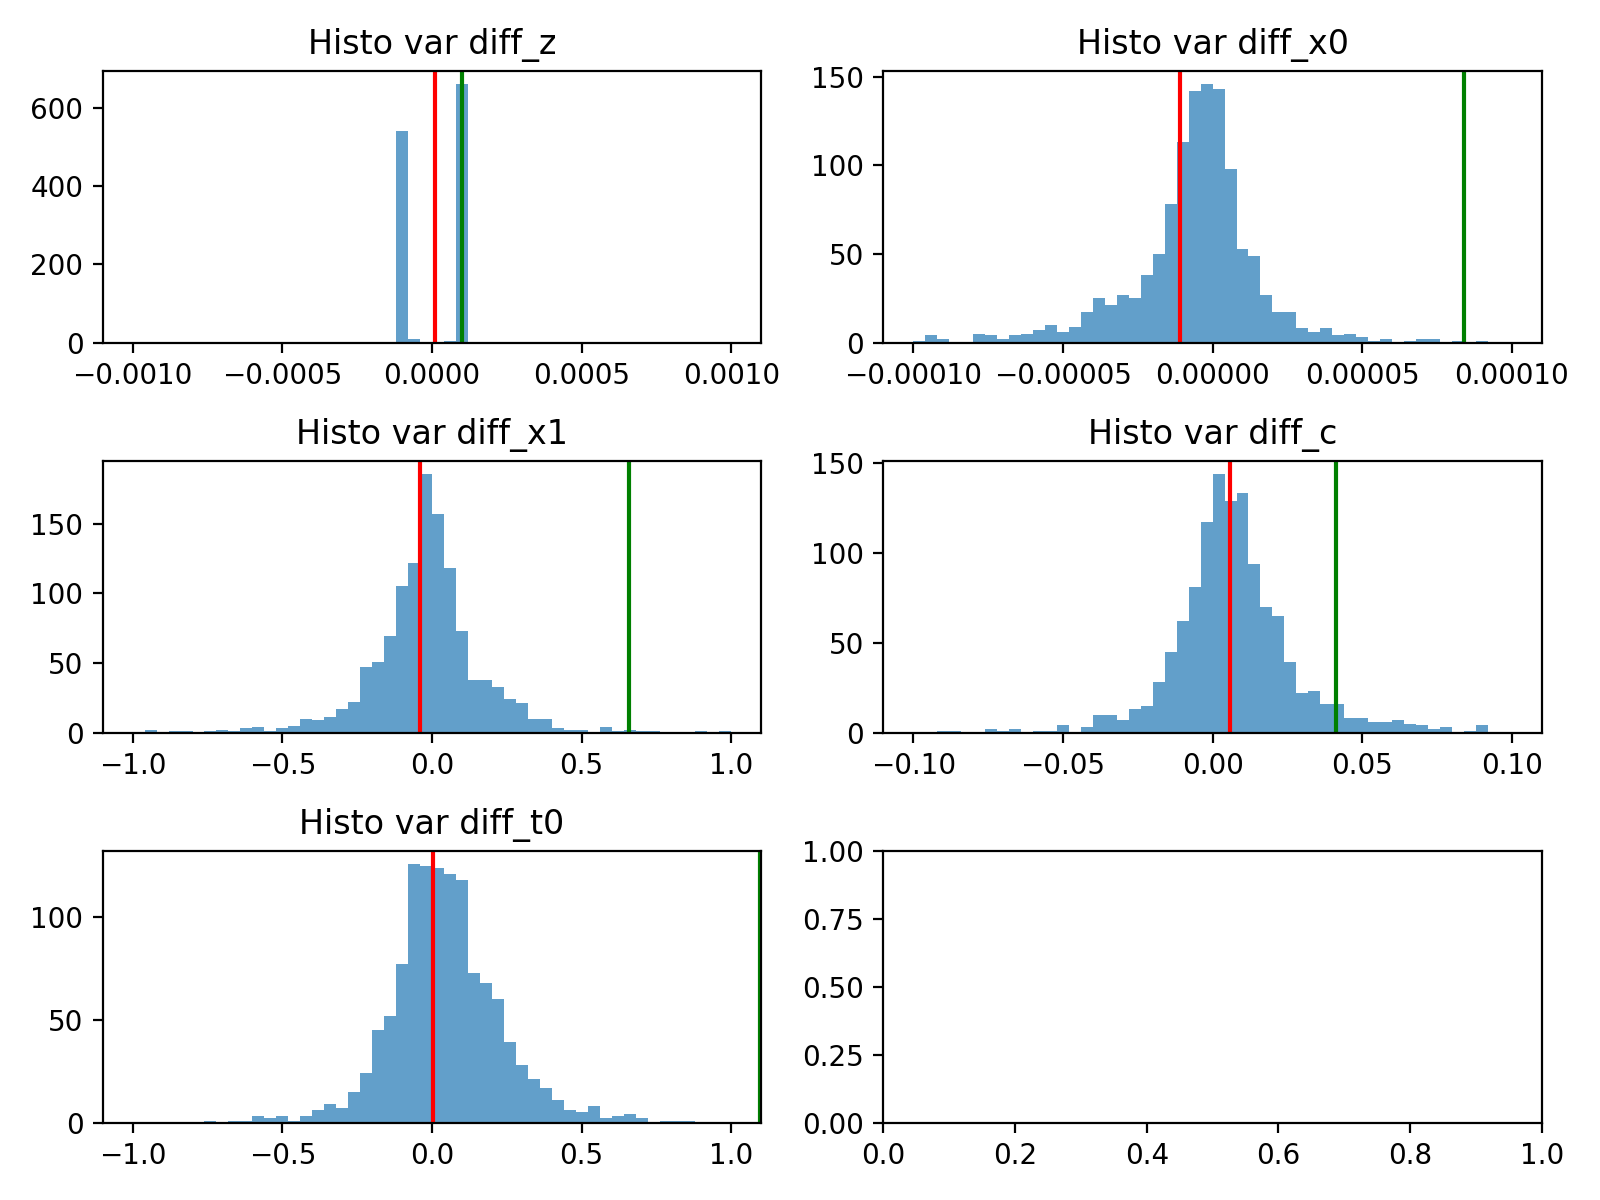

diff_z / moyenne = 9.7376599208032e-06 / equart type = 9.893626870097551e-05
diff_x0 / moyenne = -1.076488679533227e-05 / equart type = 8.389394830052211e-05
diff_x1 / moyenne = -0.040264615094406896 / equart type = 0.6572492264689778
diff_c / moyenne = 0.005797101777066868 / equart type = 0.041245054201900694
diff_t0 / moyenne = 0.0021678222199290375 / equart type = 1.0970972311576264


In [6]:
import statistics as stat

var_ = ['diff_z','diff_x0', 'diff_x1', 'diff_c', 'diff_t0']
dico_ = dict(zip(var_, [(0,0), (0,1), (1,0), (1,1), (2,0)]))
range_ = [(-0.001,0.001), (-0.0001,0.0001), (-1,1), (-0.1, 0.1), (-1,1)]

fig, axs = plt.subplots(3, 2, figsize=(8,6))
for i, variables in enumerate(var_):
    ipos = dico_[variables][0]
    jpos = dico_[variables][1]
    
    mask = meta_new[variables] != -1
    meta_new = meta_new[mask]
    
    axs[ipos, jpos].hist(meta_new[variables], alpha = 0.7, bins=50, range=range_[i])
    axs[ipos, jpos].set_title('Histo var {}'.format(variables))
    fig.tight_layout()
    moy = np.mean(meta_new[variables])
    ecarttype = np.std(meta_new[variables])

    print(variables, '/ moyenne =', moy, '/ equart type =', ecarttype)
    axs[ipos, jpos].axvline(x=moy, ymin=0, ymax=1000, color='r', label='moyenne')
    axs[ipos, jpos].axvline(x=ecarttype, ymin=0, ymax=1000, color='g', label='équart type')
    
#plt.savefig("plot diff_param for ntransient=10000 and z not fixed.png")

# $X^{2}$ test

<IPython.core.display.Javascript object>


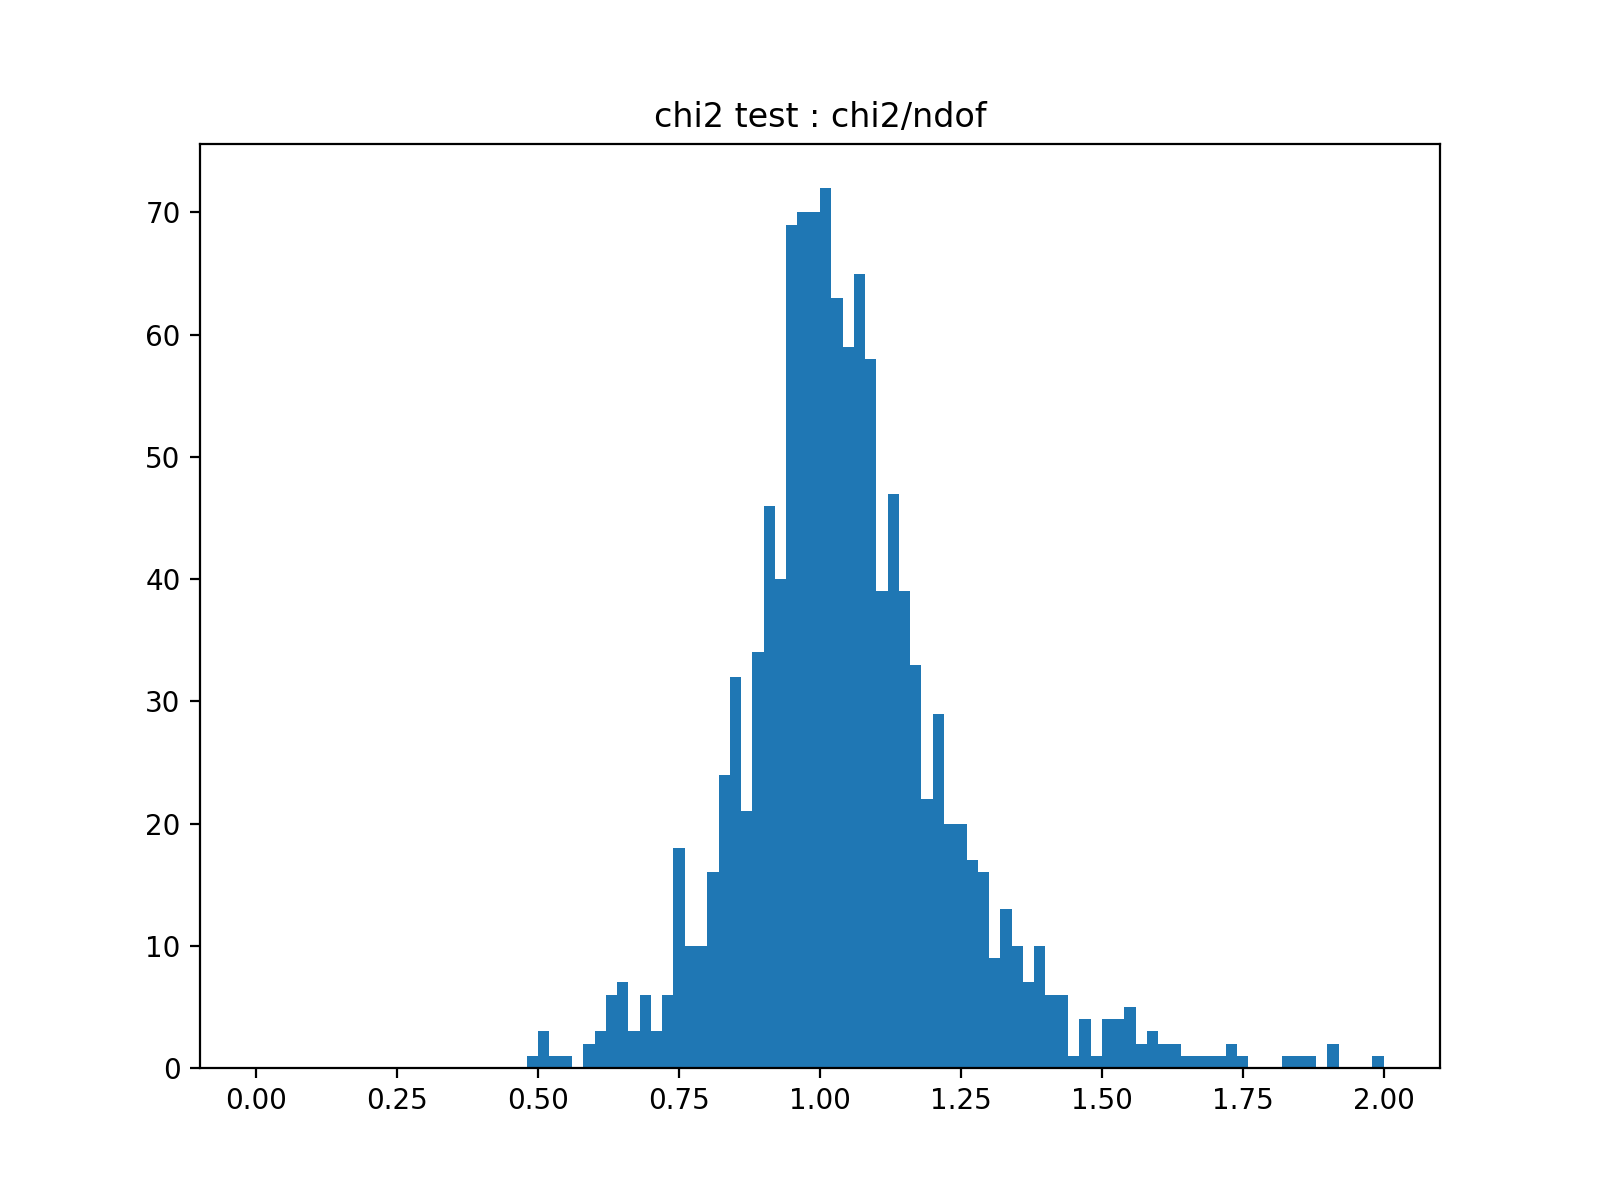

moy chi2 = 1.1021130214104933


In [7]:
mask = meta['chisq'] != -1
meta = meta[mask]

chi2 = meta['chisq']
ndof = meta['ndof']
test = chi2/ndof
#testmask = test<30

plt.figure(figsize=(8,6))
plt.hist(test, bins=100, range=(0,2))
plt.title('chi2 test : chi2/ndof')
print('moy chi2 =', np.mean(test))
#plt.savefig("plot chi2 for ntransient=10000 and z not fixed.png")

# Erreur couleur en fonction de z

<IPython.core.display.Javascript object>


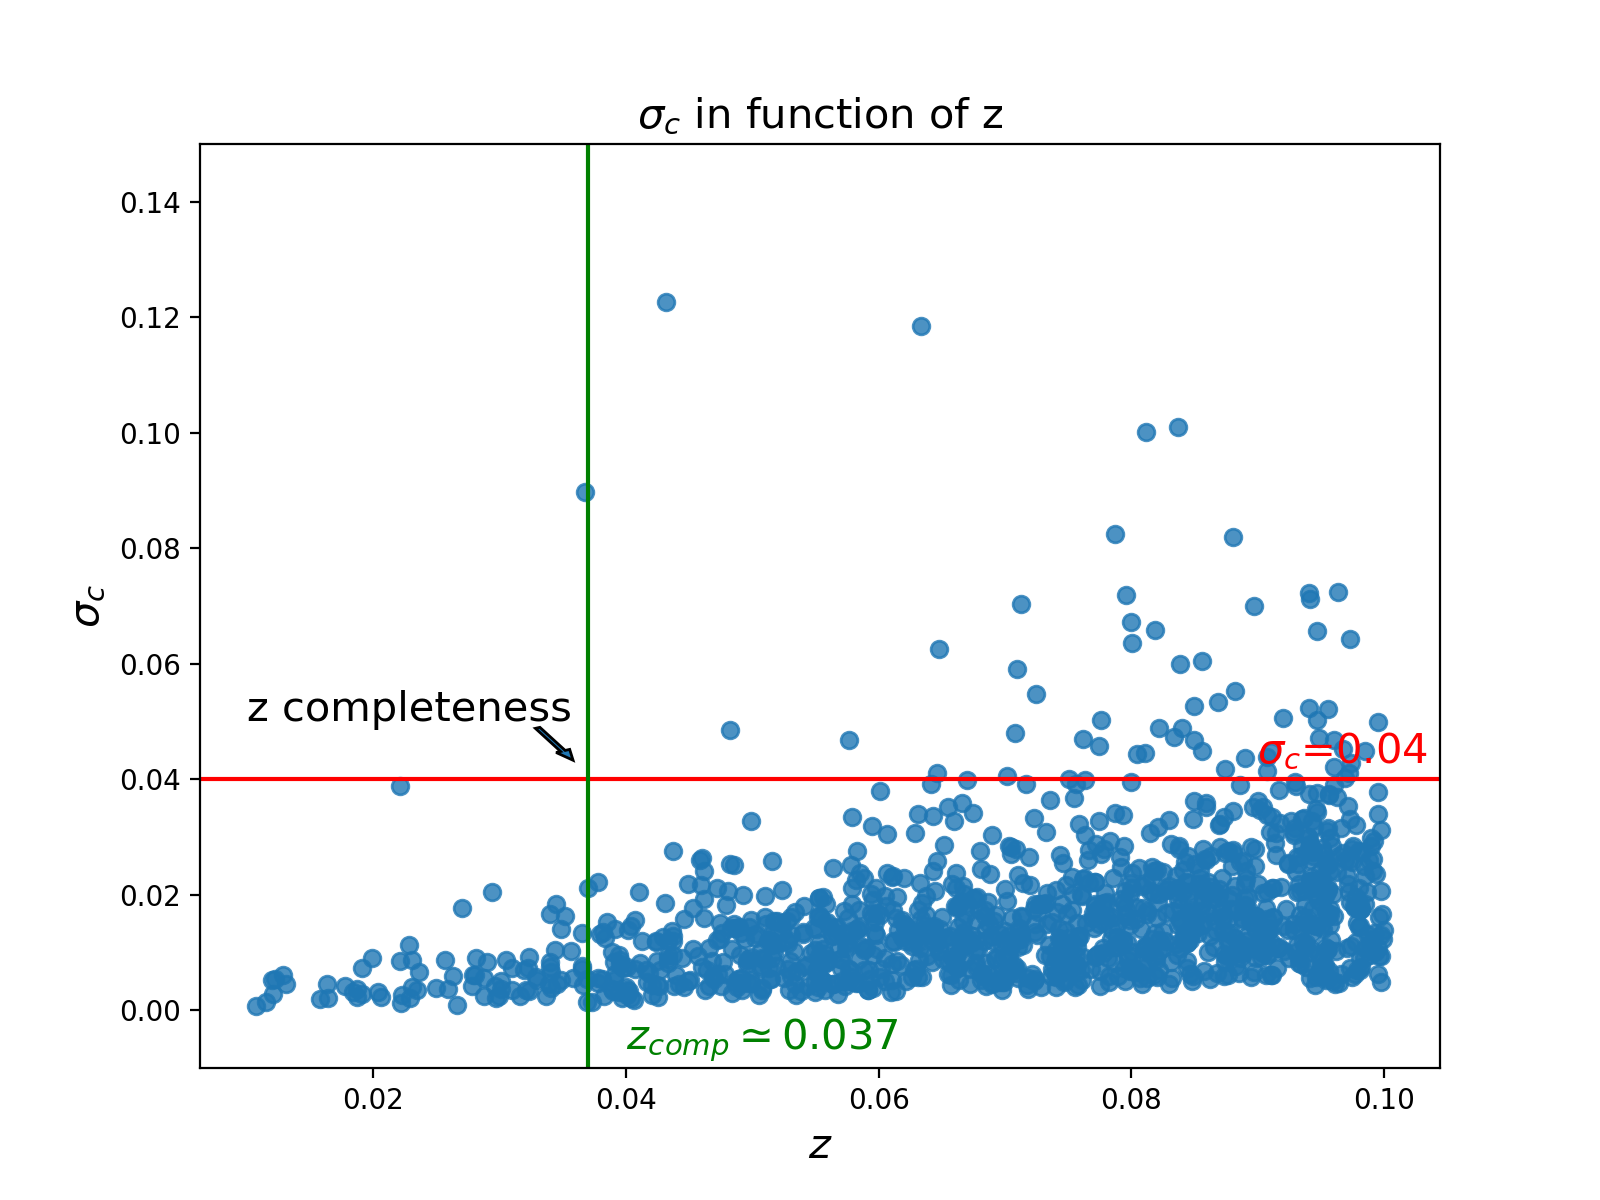

In [22]:
plt.figure(figsize=(8,6))
meta['chi'] = meta['chisq']/meta['ndof']
plt.scatter(meta['z'], meta['c_err'], alpha=0.8)
plt.axhline(y=0.04, color='r', linestyle='-')
plt.axvline(x=0.037, color='g')
plt.title('$\sigma_{c}$ in function of z', fontsize=15)
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\sigma_{c}$', fontsize=15)
plt.arrow(0.033, 0.0489, 0.002, -0.004, width = 0.0004)
plt.text(0.01, 0.05, 'z completeness', fontsize=15)
plt.text(0.09, 0.043, '$\sigma_{c}$=0.04', fontsize=15, c='r')
plt.text(0.04, -0.007, '$z_{comp} \simeq 0.037$', fontsize=15, c='g')

plt.ylim(-0.01,0.15)
plt.show()

plt.savefig("plot c_err fc z ntransient=7040 and z not fixed.png")

# $SNR_{band}$

In [23]:
class_2 = Read_LightCurve(file_name='Data.hdf5', inputDir='/Users/manon/dataLC')

sg, sr, si = [], [], []
for path in meta['path']:
    lc = class_2.get_table(path=path)
    mask_g = lc['band']=='ztfg'
    mask_r = lc['band']=='ztfr'
    mask_i = lc['band']=='ztfi'
    lc_g, lc_r, lc_i = lc[mask_g], lc[mask_r], lc[mask_i]
    
    sg.append(np.sqrt(np.sum(lc_g['flux']/lc_g['fluxerr'])))
    sr.append(np.sqrt(np.sum(lc_r['flux']/lc_r['fluxerr'])))
    si.append(np.sqrt(np.sum(lc_i['flux']/lc_i['fluxerr'])))
    
meta['SNR_g'], meta['SNR_r'], meta['SNR_i'] = sg, sr, si

/var/folders/8n/j9hb298x4xq39l_vtv55kkp00000gp/T/ipykernel_5731/3501006921.py:13: RuntimeWarning: invalid value encountered in sqrt
  si.append(np.sqrt(np.sum(lc_i['flux']/lc_i['fluxerr'])))


<IPython.core.display.Javascript object>


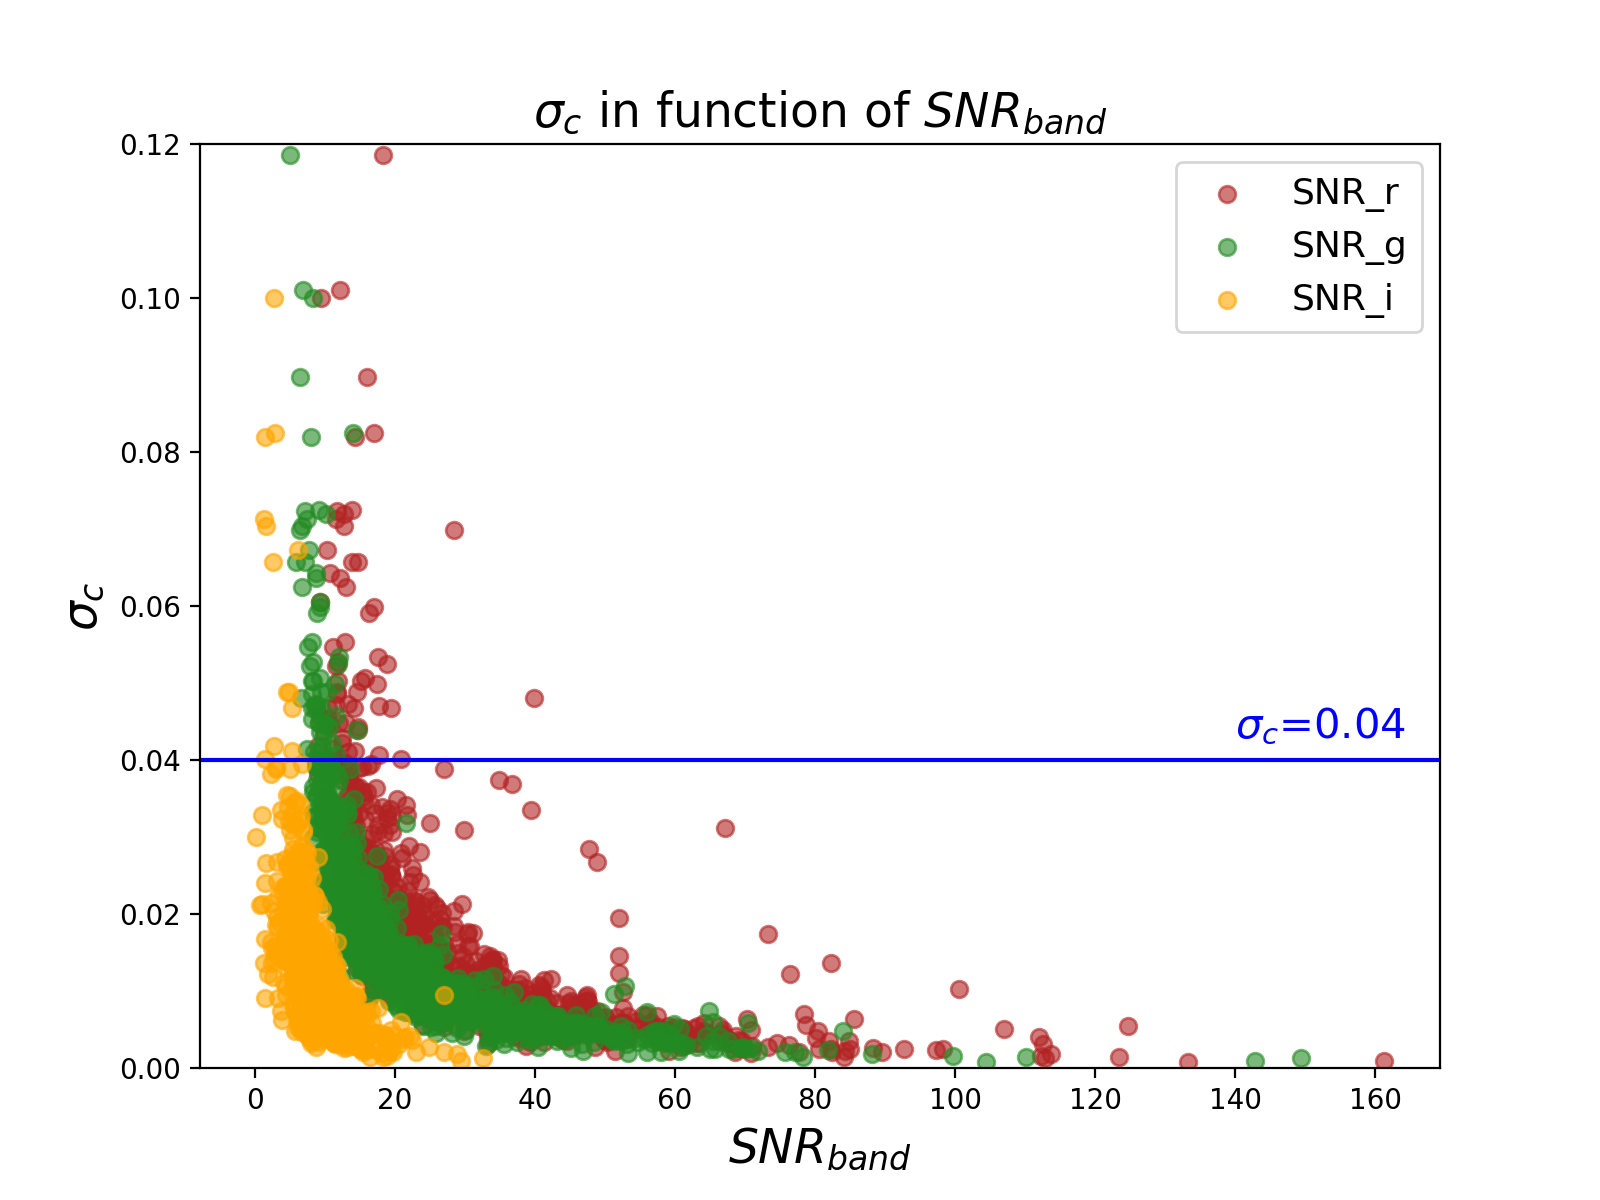

In [27]:
mask1 = meta['c_err'] != -1
mask2 = meta['SNR_i'] != 0
meta, md_i = meta[mask1], meta[mask2]

plt.figure(figsize=(8,6))
plt.scatter(meta['SNR_r'], meta['c_err'], label='SNR_r', alpha=0.6, c='firebrick')
plt.scatter(meta['SNR_g'], meta['c_err'], label='SNR_g', alpha=0.6, c='forestgreen')
plt.scatter(md_i['SNR_i'], md_i['c_err'], label='SNR_i', alpha=0.6, c='orange')
plt.axhline(y=0.04, color='b', linestyle='-')
plt.text(140, 0.043, '$\sigma_{c}$=0.04', fontsize=15, c='b')
plt.ylim(0,0.12)

plt.title('$\sigma_{c}$ in function of $SNR_{band}$', fontsize=17)
plt.ylabel('$\sigma_{c}$', fontsize=17)
plt.xlabel('$SNR_{band}$', fontsize=17)
plt.legend(fontsize=13)
plt.show()
plt.savefig('errSNR for nt=7040.png')

# Proche x1=-2.0 et c=0.2

57


<IPython.core.display.Javascript object>


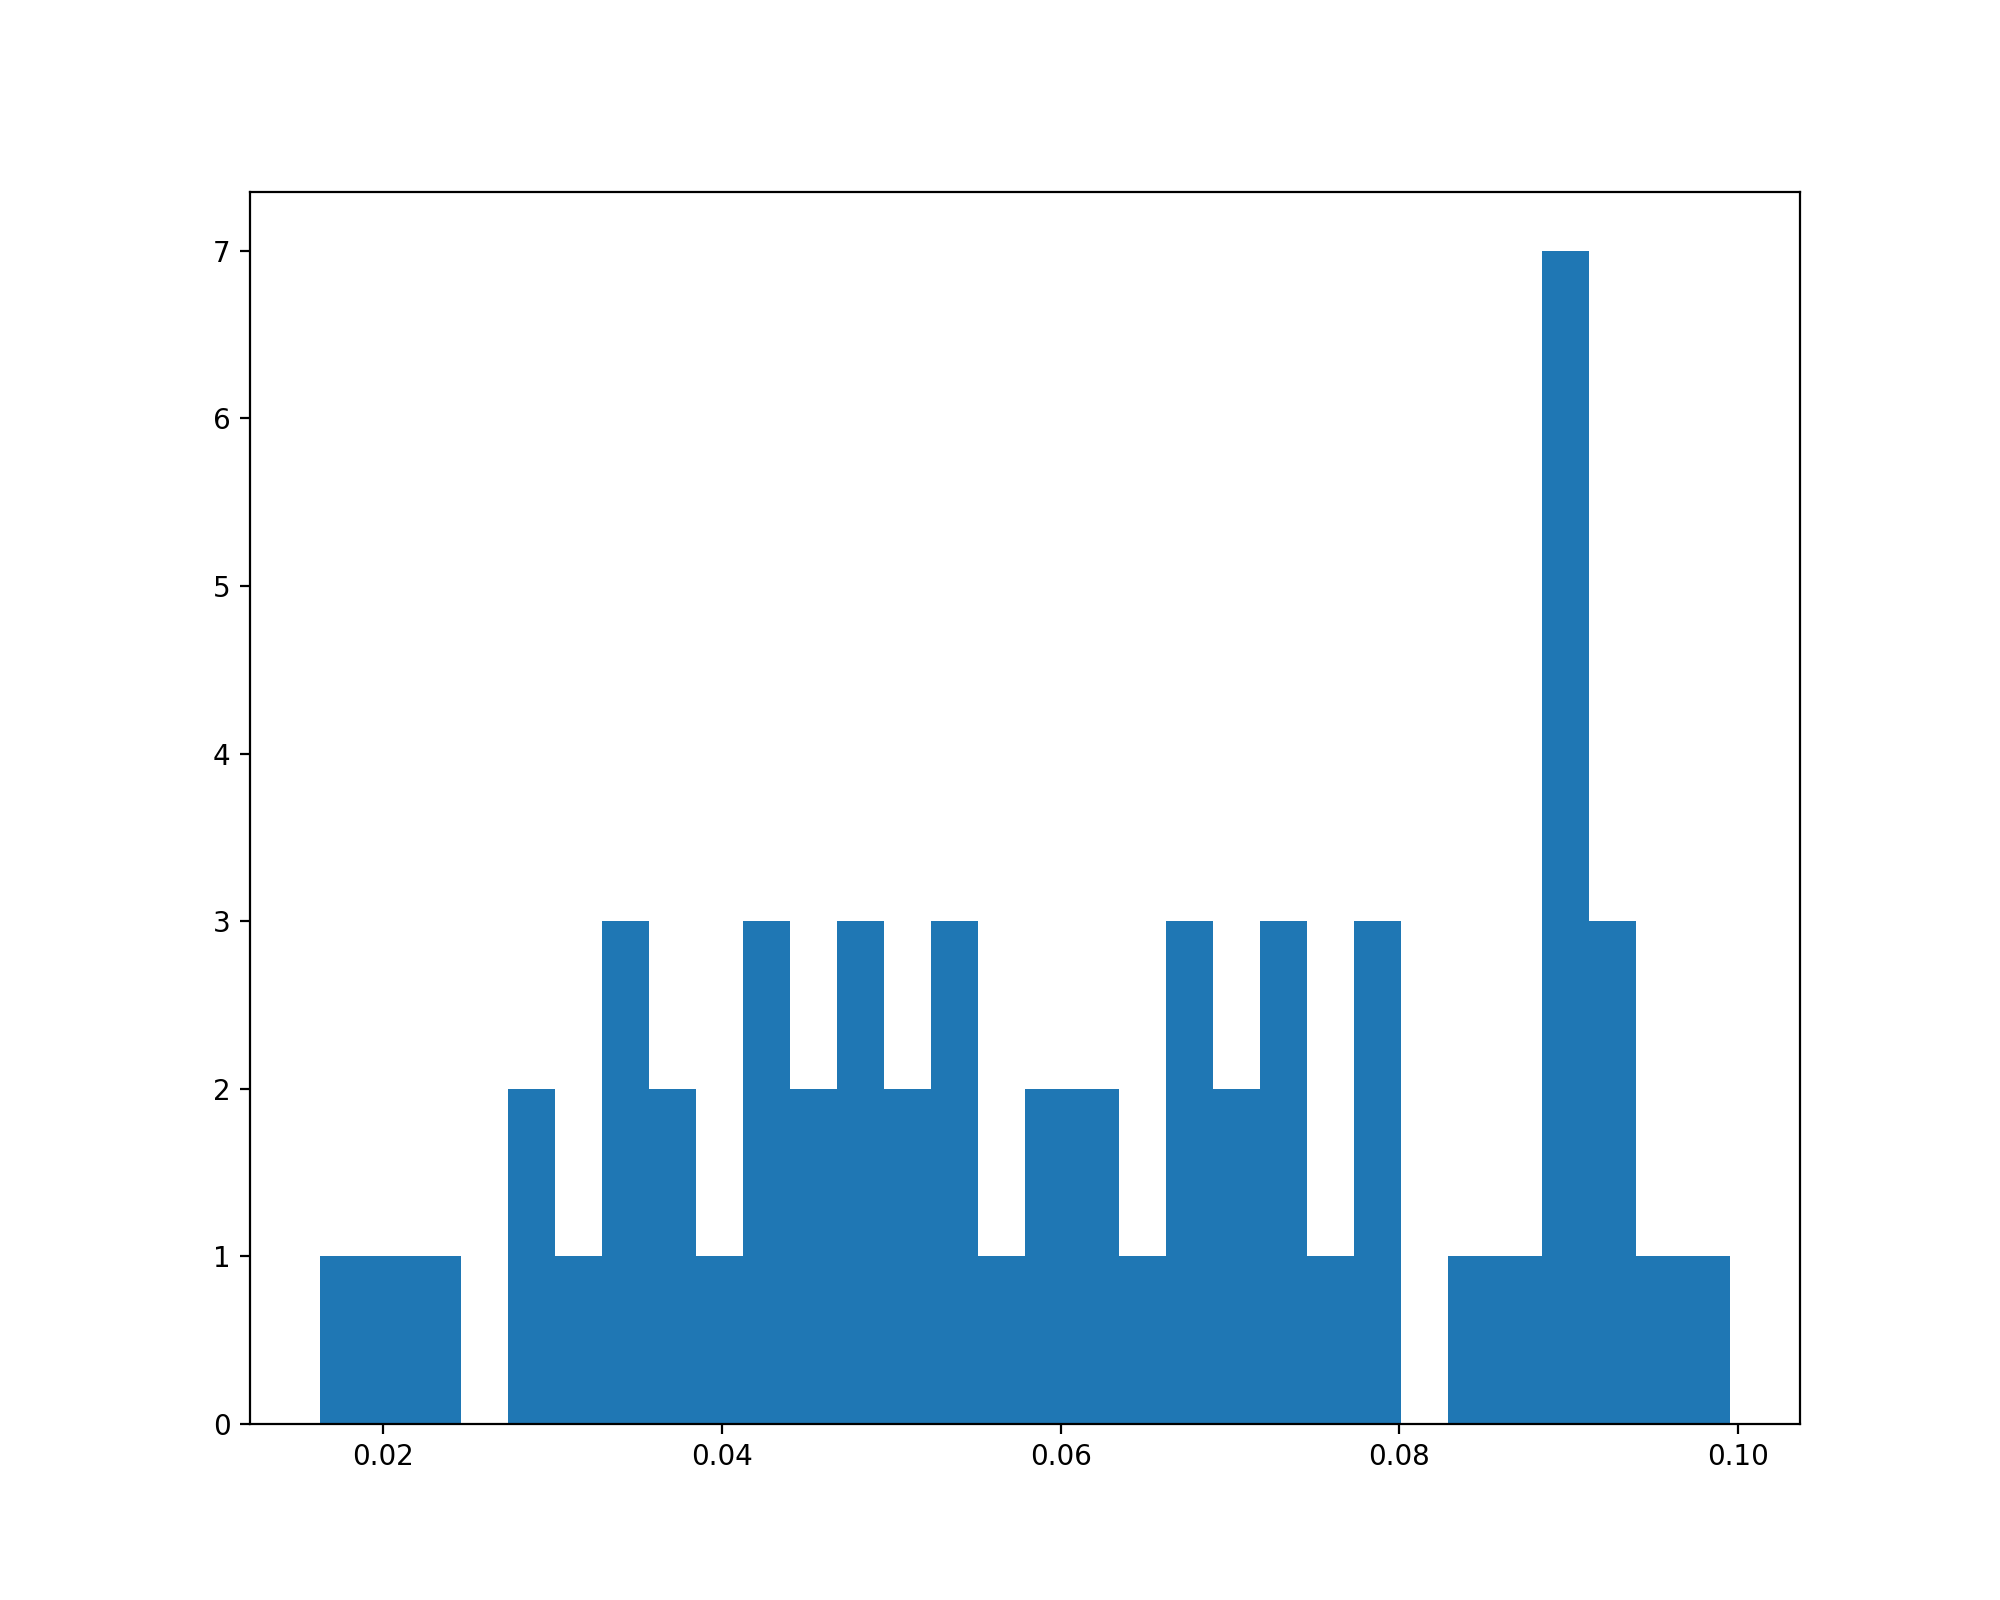

In [11]:
mask_x1_inf = meta['x1']>-2.5
mask_x1_sup = meta['x1']<-1.5
mask_x1 = mask_x1_inf & mask_x1_sup

meta1 = meta[mask_x1]

mask_c_inf = meta1['c']>-0.5
mask_c_sup = meta1['c']<0.5
mask_c = mask_c_inf & mask_c_sup

meta2 = meta1[mask_c]

mask_sigma_c = meta2['c_err']<=0.04
meta_ = meta2[mask_sigma_c]
print(len(meta_))

plt.figure(figsize=(10,8))
plt.hist(meta_['z'], bins=30)
plt.show()

<IPython.core.display.Javascript object>


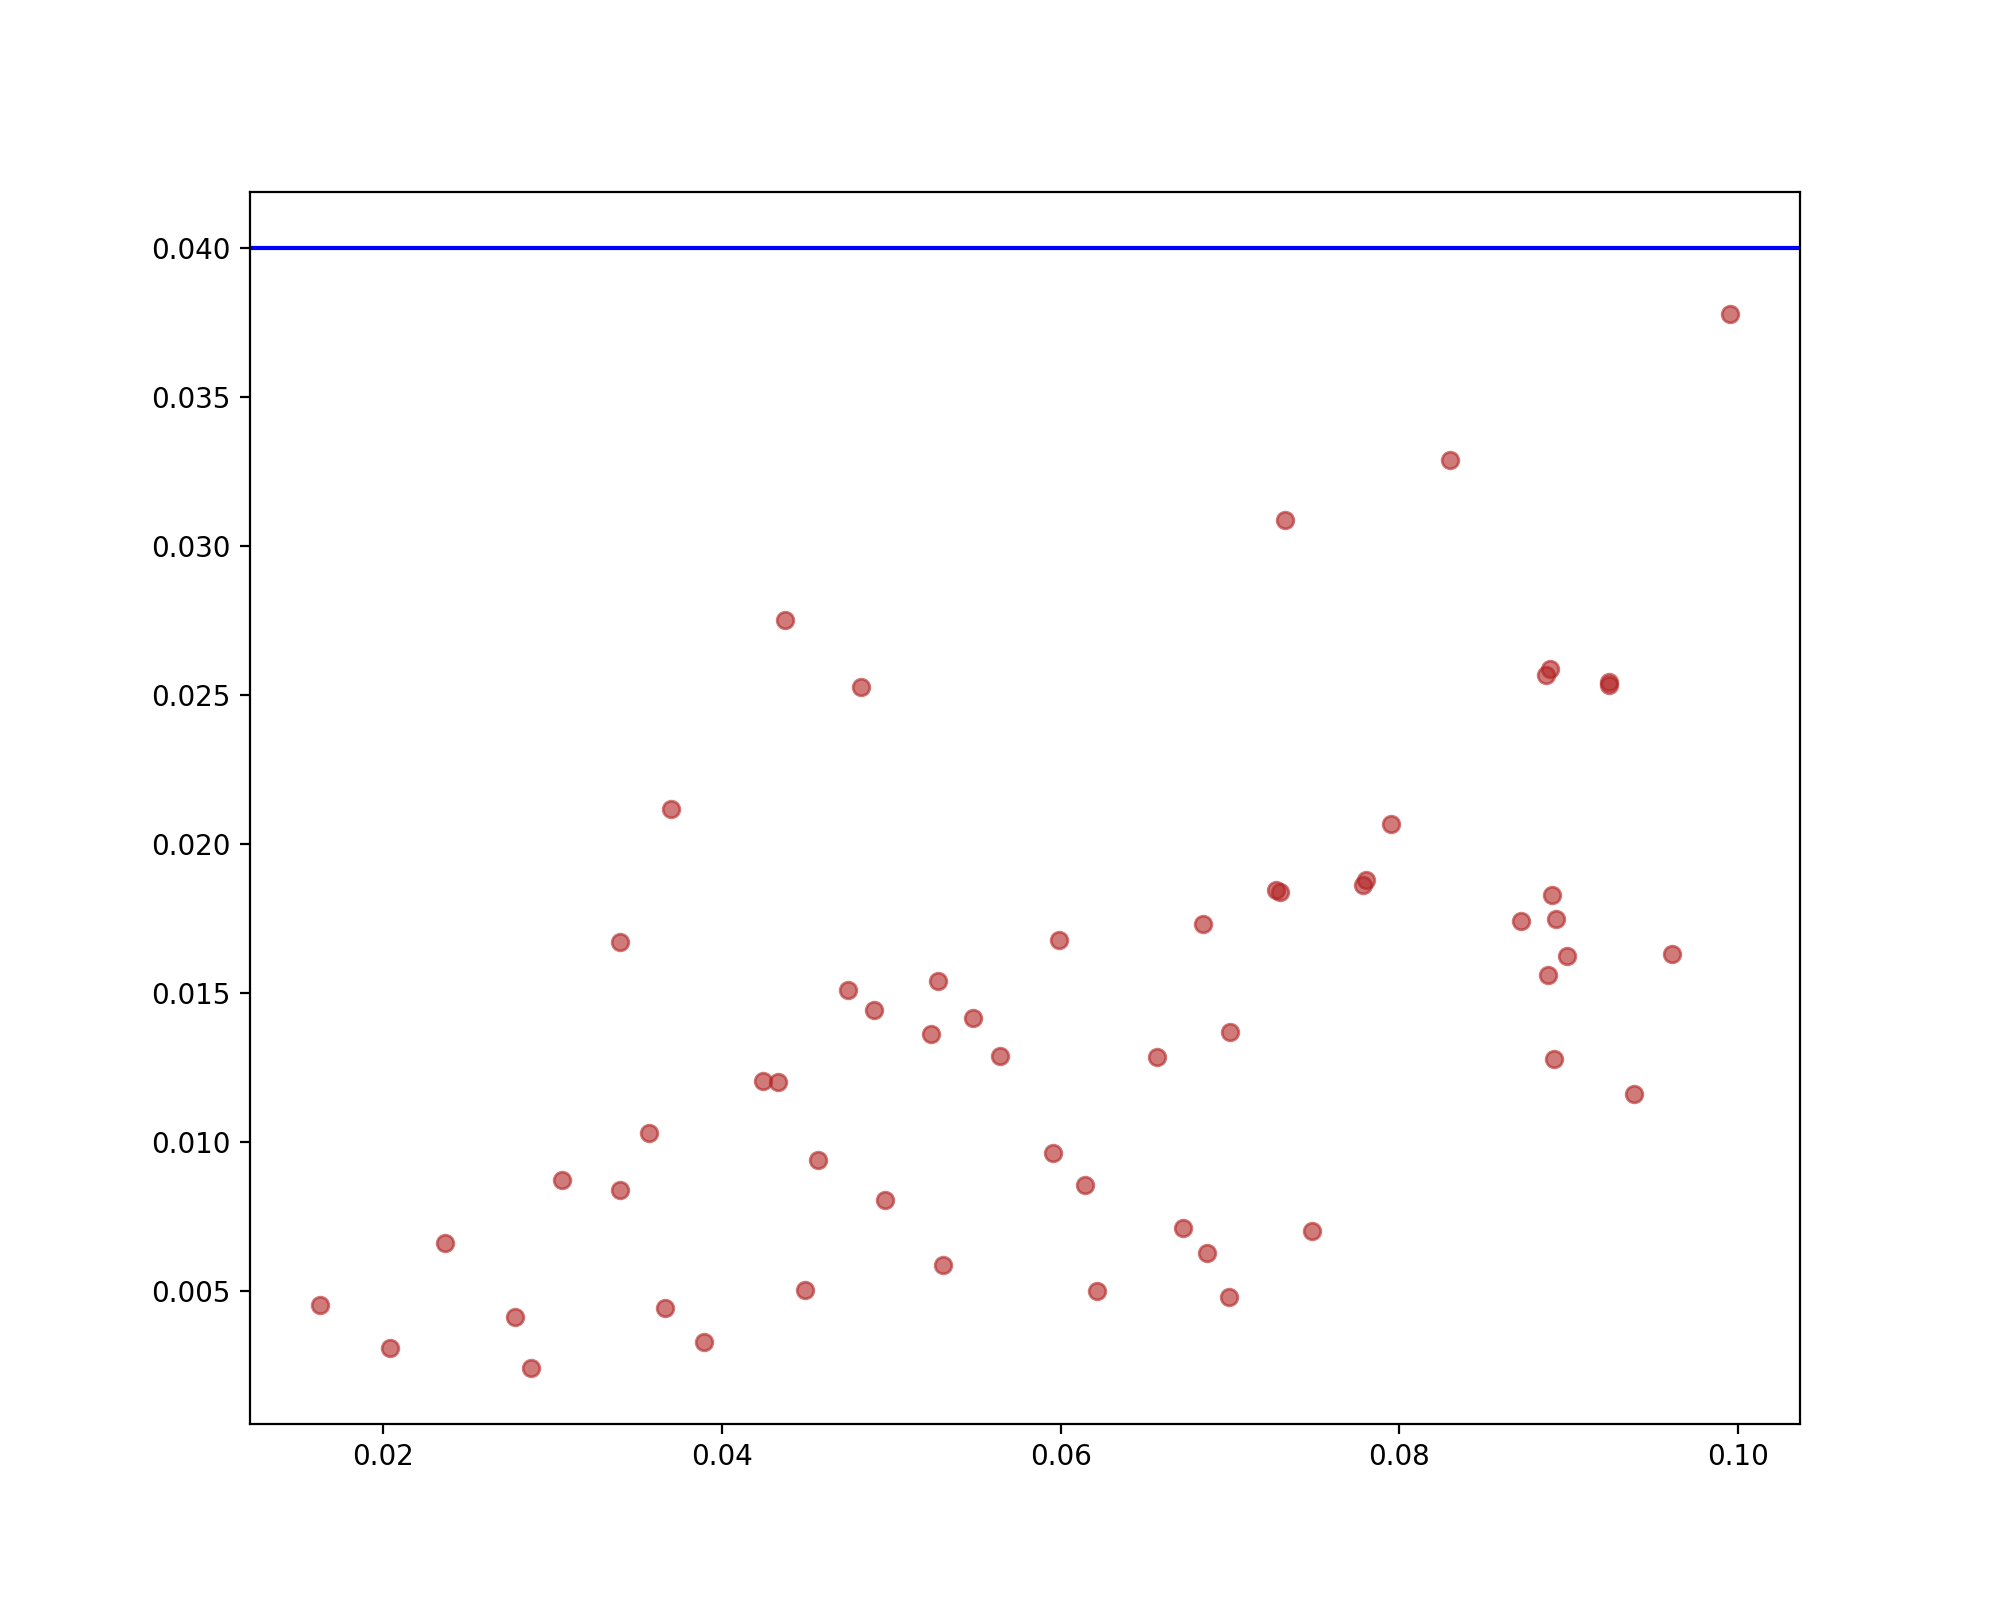

In [12]:
mask1 = meta_['c_err'] != -1
mask2 = meta_['SNR_i'] != 0
meta2, md_i2 = meta_[mask1], meta_[mask2]

plt.figure(figsize=(10,8))
plt.scatter(meta2['z'], meta2['c_err'], label='SNR_r', alpha=0.6, c='firebrick')
plt.axhline(y=0.04, color='b', linestyle='-')
plt.show()